In [1]:
import torch

In [2]:
# Tensors
x = torch.FloatTensor([[1,2,3],[4,5,6]])
print(x.size(),'\n',x)

torch.Size([2, 3]) 
 tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [3]:
# Add tensors
x.add_(torch.ones([2,3]) + torch.ones([2,3]))

tensor([[3., 4., 5.],
        [6., 7., 8.]])

In [4]:
# 此时x已经改变
# Subtract Tensor
x.sub_(torch.ones([2,3]) * 2)

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [6]:
# Pytorch和Numpy转换
import numpy as np
y = np.matrix([[2,2],[2,2],[2,2]])
z = np.matrix([[2,2],[2,2],[2,2]],dtype='int16')
x.short()

tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int16)

In [7]:
torch.from_numpy(z)
# 将tensor张量转换为numpy矩阵 tensor.numpy()
# 将numpy转换为Variable sub_va = Variable(torch.from_numpy(sub_img))
# 将Variable张量转化为numpy sub_np2 = sub_va.data.numpy()

tensor([[2, 2],
        [2, 2],
        [2, 2]], dtype=torch.int16)

In [8]:
# Reshape tensors(similar to np.reshape)
x.view(1,6)

tensor([[1., 2., 3., 4., 5., 6.]])

In [9]:
# CPU和GPUs
x = torch.FloatTensor([[1,2,3],[4,5,6]])
y = np.matrix([[2,2,2],[2,2,2]],dtype='float32')
if (torch.cuda.is_available()):
    x = x.cuda()
    y = torch.from_numpy(y).cuda()
    z = x + y
print(z)
print(x.cpu())

tensor([[3., 4., 5.],
        [6., 7., 8.]], device='cuda:0')
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [10]:
# Pytorch Variables
from torch.autograd import Variable
v1 = Variable(torch.tensor([1.,2.,3.]),requires_grad = False)
v2 = Variable(torch.tensor([4.,5.,6.]),requires_grad = True)
v3 = v1 * v2
v3.data.numpy()

array([ 4., 10., 18.], dtype=float32)

In [11]:
# Variables remember what created them
v3.grad_fn

In [13]:
# 反向传播
# Backpropagation with example of sin(x)
x = Variable(torch.Tensor(np.array([0.,1.,1.5,2.]) * np.pi),requires_grad = True)
y = torch.sin(x)
x.grad
y.backward(torch.Tensor([1.,1.,1.,1]))
# check gradient in indeed cos(x)
if ((x.grad.data.int().numpy() == torch.cos(x).data.int().numpy()).all()):
    print ('d(sin(x) / d(x) = cons(x))')

d(sin(x) / d(x) = cons(x))


In [14]:
# Simple Liner Regression
#         Fit a line to the data. Y = w.x + b

# Deterministic behavior
np.random.seed(0)
torch.manual_seed(0)


# Step 1: Dataset

w = 2; b = 3
x = np.linspace(0, 10, 100)
y = w*x + b + np.random.randn(100)*2
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [17]:
# Step 2: Model

class LinearRegressionModel(torch.nn.Module):
    def __init__(self,in_dimn,out_dimn):
        super(LinearRegressionModel,self).__init__()
        self.model = torch.nn.Linear(in_dimn,out_dimn)
    def forward(self,x):
        y_pred = self.model(x)
        return y_pred
model = LinearRegressionModel(in_dimn=1,out_dimn=1)

In [18]:
# Step 3: Training
cost = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01,momentum=0.9)
inputs = Variable(torch.from_numpy(x.astype('float32')))
outputs = Variable(torch.from_numpy(y.astype('float32')))
for epoch in range(100):
    # forward pass
    y_pred = model(inputs)
    # compute loss
    loss = cost(y_pred,outputs)
    # backward pass 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if ((epoch + 1) % 10 == 0):
        print('epoch {},loss {}'.format(epoch + 1,loss.data))

epoch 10,loss 33.951412200927734
epoch 20,loss 8.786260604858398
epoch 30,loss 17.577659606933594
epoch 40,loss 11.382862091064453
epoch 50,loss 5.572602272033691
epoch 60,loss 4.080413818359375
epoch 70,loss 4.094191074371338
epoch 80,loss 4.1218461990356445
epoch 90,loss 4.069921493530273
epoch 100,loss 4.03877067565918


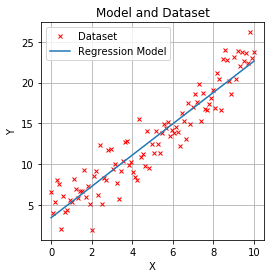

In [23]:
# Step 4: Display model and confirm
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.title('Model and Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.plot(x, y, 'ro', label='Dataset', marker='x', markersize=4)
plt.plot(x, model.model.weight.item()*x+model.model.bias.item(), label='Regression Model')
plt.legend()
plt.show()